## **Preparing the work environment**

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## load dataset

In [2]:
train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/train1.csv')
test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/test1.csv')

## EDA

In [3]:
print('Shape of train ',train.shape)
print('Shape of test ',test.shape)

Shape of train  (1023999, 6)
Shape of test  (256000, 5)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023999 entries, 0 to 1023998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1023999 non-null  object
 1   flag    1023999 non-null  object
 2   user    1023999 non-null  object
 3   text    1023999 non-null  object
 4   id      1023999 non-null  int64 
 5   target  1023999 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 46.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256000 entries, 0 to 255999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    256000 non-null  object
 1   flag    256000 non-null  object
 2   user    256000 non-null  object
 3   text    256000 non-null  object
 4   id      256000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 9.8+ MB


<Axes: xlabel='target', ylabel='count'>

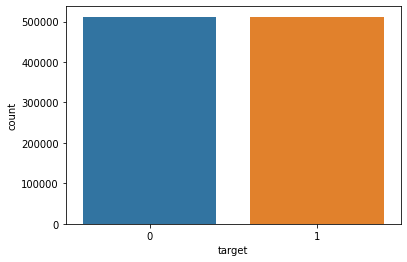

In [6]:
sns.countplot(x=train['target'])

In [7]:
target = train['target']
train_id = train['id']
test_id = test['id']
train.drop(['id','date','user','flag'],axis=1,inplace=True)
test.drop(['id','date','user','flag'],axis=1,inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023999 entries, 0 to 1023998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1023999 non-null  object
 1   target  1023999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256000 entries, 0 to 255999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    256000 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


## Preprocessing 
Extact text for column

1- Remove punctuation: Punctuation marks such as commas, periods, and question marks do not provide much meaning for sentiment analysis, so you can remove them from the text.

2- Convert text to lowercase: Convert all the text to lowercase so that similar words can be grouped together.

3- Tokenize the text: Tokenization is the process of splitting a sentence into words. You can use NLTK library to tokenize the text.

4- Remove stop words: Stop words are common words such as "the", "and", and "in" that do not add much meaning to the text. You can remove them using NLTK's stop words list.

5- Stemming/Lemmatization: Stemming and lemmatization are techniques to reduce the word to its root form. It can help in reducing the feature space. You can use NLTK's WordNetLemmatizer for lemmatization or PorterStemmer for stemming.

In [10]:
def preprocess_text(text):
  text = re.sub('[^a-zA-Z]',' ',text).strip()
  text = text.lower()
  tokens = word_tokenize(text)
  filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
  stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
  return " ".join(stemmed_tokens)

In [11]:
train['text'] = train['text'].apply(lambda x : preprocess_text(x))
test['text'] = test['text'].apply(lambda x : preprocess_text(x))

### convert Data frame to numpy array and transform it to vector

In [12]:
X_train , X_val = train_test_split(train,test_size=.5,random_state=2)

In [13]:
cv = TfidfVectorizer(ngram_range=(1,3), analyzer = 'word', use_idf=True, smooth_idf=True, sublinear_tf=True)
df_train = cv.fit_transform(X_train['text'])
df_val = cv.transform(X_val['text']) 
df_test = cv.transform(test['text'])

In [14]:
print('df_train shape ',df_train.shape)
print('df_train shape ',df_val.shape)

df_train shape  (511999, 4544337)
df_train shape  (512000, 4544337)


In [15]:
model = KMeans(n_clusters=2,init='random',n_init=200)

In [16]:
#model.fit(df_train)

In [17]:
#df_val

In [18]:
# pred = model.predict(df_val)
# conf_mat = confusion_matrix(X_val.target, pred)
# print(conf_mat)

In [19]:
# ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
#             fmt='.2%', cmap='Blues')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [20]:
# print(classification_report(X_val.target, pred))

In [21]:
# predictions = model.predict(df_test)

In [22]:
# output = pd.DataFrame({'Id':test_id,
#                        'target': predictions})
# output.to_csv('kmeans1.csv', index=False)

# print("Your submission was successfully saved!")

The message "PCA does not support sparse input. See TruncatedSVD for a possible alternative" means that the PCA algorithm in scikit-learn does not accept sparse input data.

Sparse data refers to data that has a large number of zero values. In natural language processing, for example, sparse data is common when working with text data that has been converted to a bag-of-words representation.

TruncatedSVD is an alternative algorithm that can be used for dimensionality reduction on sparse data. TruncatedSVD is similar to PCA, but specifically designed to handle sparse matrices as input. The TruncatedSVD algorithm is a variant of singular value decomposition (SVD) that can be used to reduce the dimensionality of sparse data.

In [23]:
# pca = PCA(n_components=100)
# pca.fit(df_train)
# X_train_reduce = pca.transform(df_train)
# X_val_reduce = pca.transform(df_val)

## Reduce the dimensionality using TruncatedSVD

In [24]:
# svd = TruncatedSVD(n_components=1000)
# X_train_reduce = svd.fit_transform(df_train)
# X_val_reduce = svd.fit_transform(df_val)
# test_reduce = svd.fit_transform(df_test)

In [25]:
# model.fit(X_train_reduce)

In [26]:
# pred = model.predict(X_val_reduce)
# conf_mat = confusion_matrix(X_val.target, pred)
# print(conf_mat)

In [27]:
# ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
#             fmt='.2%', cmap='Blues')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [28]:
# print(classification_report(X_val.target, pred))

In [29]:
# predictions = model.predict(test_reduce)
# output = pd.DataFrame({'Id':test_id,
#                        'target': predictions})
# output.to_csv('kmeans2.csv', index=False)

# print("Your submission was successfully saved!")

## Hierarchical Clustering

Using the reduced data

In [30]:
model2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
# model2.fit(X_train_reduce)

In [31]:
# pred = model.predict(X_val_reduce)
# conf_mat = confusion_matrix(X_val.target, pred)
# print(conf_mat)

In [32]:
# ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
#             fmt='.2%', cmap='Blues')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [33]:
# print(classification_report(X_val.target, pred))

In [34]:
# predictions = model.predict(test_reduce)
# output = pd.DataFrame({'Id':test_id,
#                        'target': predictions})
# output.to_csv('kmeans3.csv', index=False)

# print("Your submission was successfully saved!")

using the data without reduced

In [ ]:
model2.fit(df_train.toarray())

In [ ]:
pred = model.predict(df_val)
conf_mat = confusion_matrix(X_val.target, pred)
print(conf_mat)

In [ ]:
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(X_val.target, pred))

In [ ]:
predictions = model.predict(df_test)
output = pd.DataFrame({'Id':test_id,
                       'target': predictions})
output.to_csv('kmeans4.csv', index=False)

print("Your submission was successfully saved!")